<a href="https://colab.research.google.com/github/slapazromero/EjercicioNB_Wine/blob/main/Ejercicios_NaiveBayes_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Preproceso.

## Importacion de los datos del dataset.

In [2]:
wine = pd.read_csv('WineQT.csv')

## Mostrar las primeras y ultimas filas del dataframe importado.

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


## Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.) 

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Modificaciones de los datos.

In [6]:
wine = wine.drop('Id', axis=1)

## Mostrar las primeras y ultimas filas del dataframe modificado.

In [7]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Mostrar parámetros estadísticos de los datos modificados (media, desviación típica, cuartiles, etc.) 

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Mostrar un mapa de calor que indique la correlación entre variables.

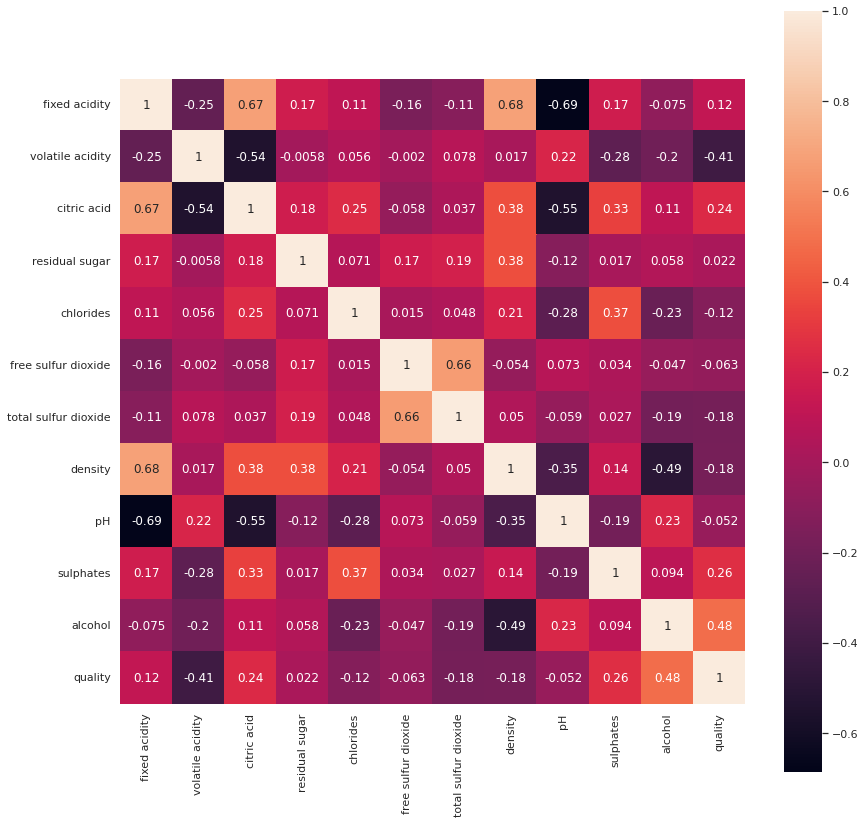

In [10]:
sns.set(rc = {'figure.figsize':(14,14)})
sns.heatmap(wine.corr(), square=True, annot=True)

# Seleccionar las características a tener en cuenta en el estudio.

Para comenzar haremos un estudio con todos los datos.

## Separar datos entre datos de entrada y etiquetas (resultados).

In [11]:
x_wine = wine.drop('quality', axis=1)
y_wine = wine['quality']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [13]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [14]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [15]:
accuracy_score(y_test, y_predict)

0.5174825174825175

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [16]:
y_predict

array([5, 5, 6, 7, 6, 5, 5, 5, 5, 5, 6, 6, 7, 6, 7, 7, 6, 5, 6, 6, 5, 5,
       5, 5, 5, 6, 6, 7, 3, 6, 6, 5, 4, 6, 6, 5, 6, 6, 5, 5, 5, 7, 6, 5,
       7, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 7, 5, 6,
       6, 5, 5, 5, 5, 7, 5, 6, 5, 6, 5, 7, 5, 7, 6, 6, 6, 7, 6, 7, 7, 6,
       5, 7, 6, 7, 7, 7, 8, 5, 5, 6, 6, 6, 7, 5, 5, 7, 5, 5, 7, 6, 6, 6,
       6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 3, 6, 6, 7, 5, 5, 5, 5, 5, 5, 7,
       7, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 8, 5, 7, 5, 6, 5, 5,
       6, 7, 7, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 7, 7, 6,
       7, 6, 7, 6, 5, 5, 5, 7, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6,
       5, 7, 5, 6, 4, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5,
       7, 7, 7, 6, 5, 6, 6, 6, 7, 5, 6, 5, 6, 6, 5, 5, 7, 7, 6, 5, 5, 7,
       6, 8, 5, 5, 6, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5,
       6, 6, 7, 5, 7, 5, 3, 7, 6, 5, 3, 5, 6, 7, 3, 5, 5, 7, 5, 7, 6, 6])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

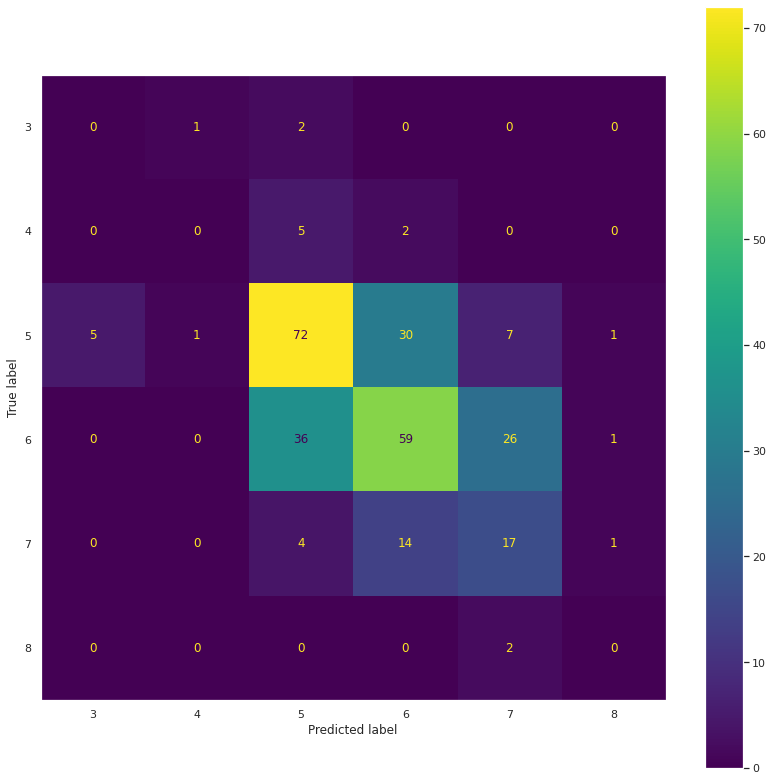

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Seleccionar las características a tener en cuenta en el estudio. (Alta correlación)

In [18]:
caracteristicas = ['volatile acidity', 'alcohol', 'sulphates', 'citric acid']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [19]:
x_wine = wine[caracteristicas]
y_wine = wine['quality']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [21]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [22]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [23]:
accuracy_score(y_test, y_predict)

0.5559440559440559

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [24]:
y_predict

array([7, 5, 5, 5, 6, 5, 7, 5, 7, 5, 6, 5, 5, 7, 6, 5, 7, 5, 5, 5, 5, 5,
       6, 5, 6, 5, 5, 6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 7, 6, 5, 5, 5, 7, 5,
       5, 5, 5, 7, 6, 6, 5, 7, 6, 5, 5, 6, 7, 5, 6, 5, 6, 7, 5, 7, 5, 7,
       5, 5, 6, 5, 5, 6, 4, 5, 6, 5, 5, 5, 6, 5, 5, 5, 7, 7, 6, 5, 5, 7,
       5, 7, 7, 7, 7, 6, 7, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 5, 5,
       6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 5, 6, 7, 5, 5, 5, 7, 5, 5, 6, 7,
       6, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 5, 7, 6, 5,
       5, 5, 3, 5, 7, 5, 5, 6, 6, 5, 7, 6, 7, 5, 7, 7, 5, 5, 7, 5, 5, 5,
       6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 6, 7, 5, 5, 6, 6, 5,
       7, 6, 5, 6, 6, 8, 5, 7, 5, 7, 5, 5, 7, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 7, 5, 5, 6, 7, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 5, 6, 5, 7, 7, 5, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

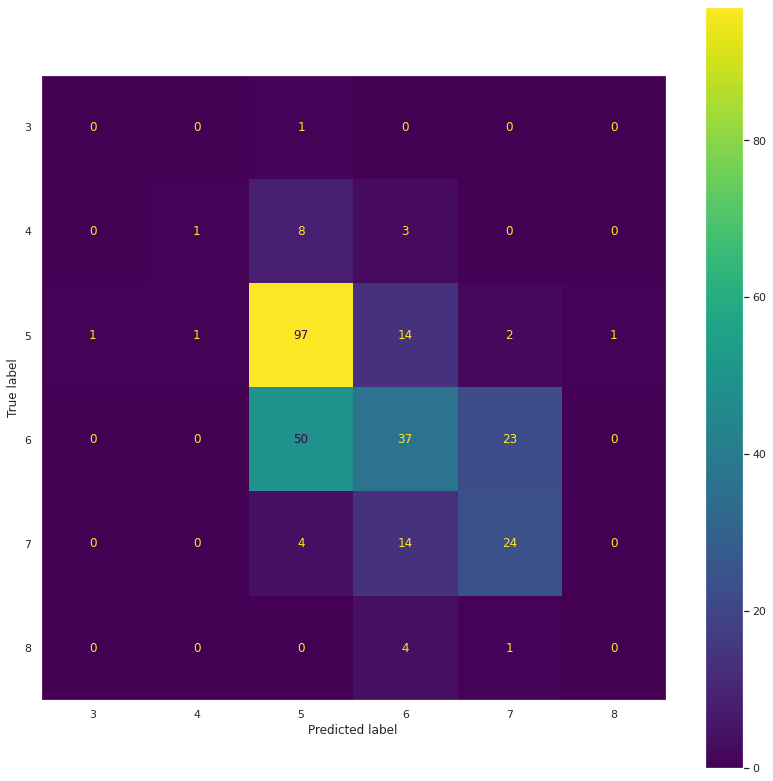

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Seleccionar las características a tener en cuenta en el estudio. (Baja correlación)

In [26]:
caracteristicas = ['residual sugar', 'pH', 'free sulfur dioxide', 'fixed acidity', 'chlorides']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [27]:
x_wine = wine[caracteristicas]
y_wine = wine['quality']

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [29]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## Realizar una predicción con los datos de prueba.

In [30]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [31]:
accuracy_score(y_test, y_predict)

0.4090909090909091

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [32]:
y_predict

array([7, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 7, 6, 5, 6, 4, 6, 6, 6, 6, 6, 6, 5,
       6, 6, 6, 7, 6, 5, 6, 6, 7, 6, 5, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4,
       6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6,
       4, 6, 6, 4, 6, 6, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

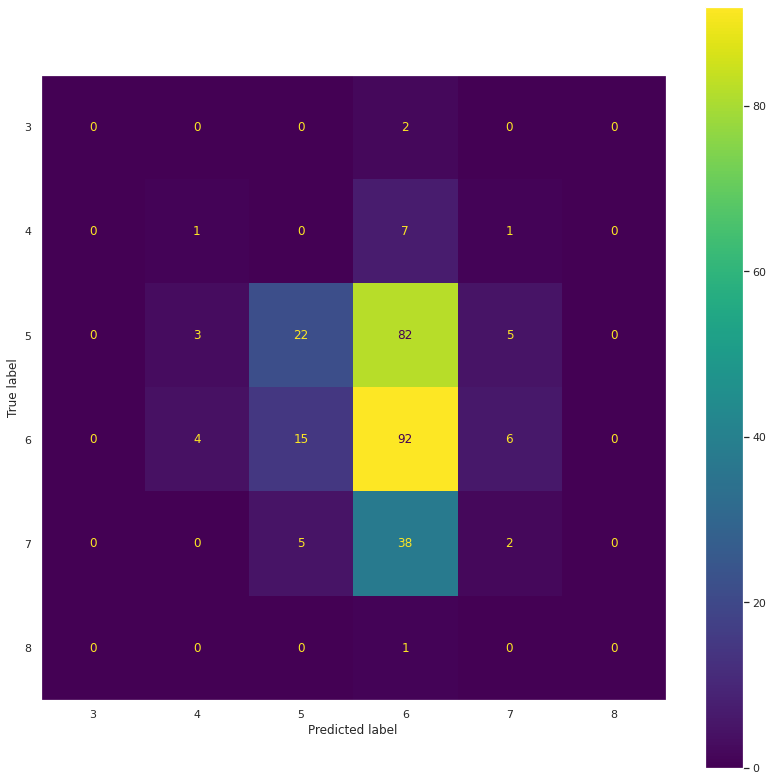

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# Optimización (probar el proceso con distintos clasificadores).

## Finalmente prueba los distintos clasificadores y realiza una pequeña comparativa indicando cuál obtiene mejores resultados.

## Seleccionar las características a tener en cuenta en el estudio.

In [34]:
caracteristicas = ['volatile acidity', 'alcohol', 'sulphates']
resultado = ['quality']

## Separar datos entre datos de entrada y etiquetas (resultados).

In [35]:
x_wine = wine[caracteristicas]
y_wine = wine[resultado]

## Separar datos entre entrenamiento y prueba (usando un 75% para entrenamiento y 25% para test)


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_wine, y_wine, test_size=0.25)

# GaussianNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [37]:
model = GaussianNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

## Realizar una predicción con los datos de prueba.

In [38]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [39]:
accuracy_score(y_test, y_predict)

0.5804195804195804

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [40]:
y_predict

array([5, 5, 5, 5, 7, 5, 5, 7, 7, 5, 5, 5, 6, 5, 4, 5, 5, 7, 6, 5, 6, 7,
       5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 5, 5, 7, 5, 5, 6, 5, 6, 4, 6, 5,
       6, 6, 6, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 7, 6, 7, 6, 6, 5, 6, 6, 5, 8, 5, 5, 5, 6,
       5, 6, 4, 6, 5, 5, 5, 7, 5, 6, 7, 5, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 7, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       5, 7, 7, 5, 5, 5, 7, 5, 5, 6, 7, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5,
       6, 5, 5, 6, 5, 7, 6, 6, 7, 8, 7, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 5, 7, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 4, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 7, 5, 6, 7, 4, 5,
       6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 6])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

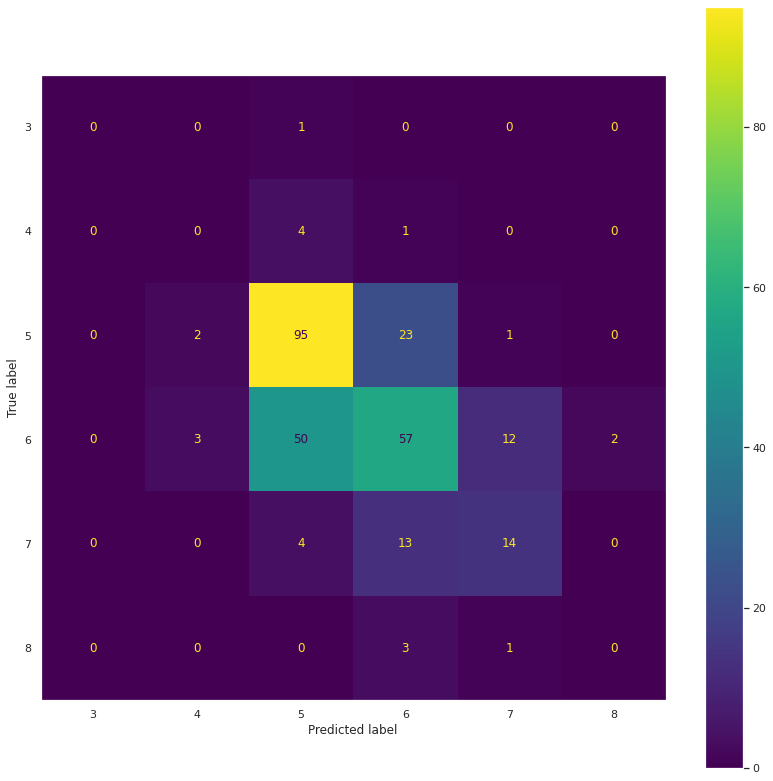

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# MultinomialNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [42]:
model = MultinomialNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

## Realizar una predicción con los datos de prueba.

In [43]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [44]:
accuracy_score(y_test, y_predict)

0.44755244755244755

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [45]:
y_predict

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

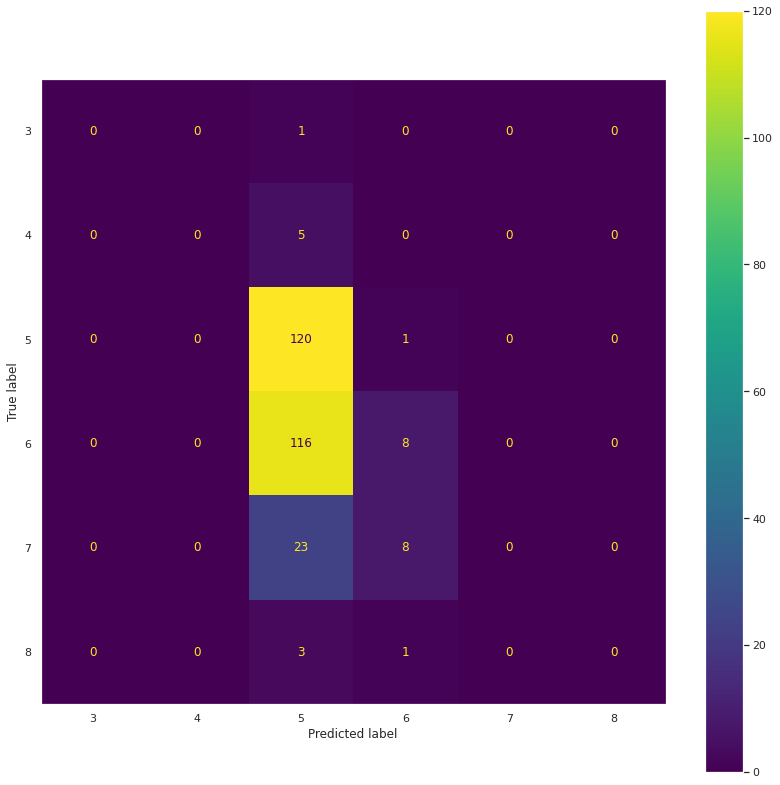

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# ComplementNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [47]:
model = ComplementNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB()

## Realizar una predicción con los datos de prueba.

In [48]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [49]:
accuracy_score(y_test, y_predict)

0.3951048951048951

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [50]:
y_predict

array([5, 5, 5, 7, 7, 5, 5, 7, 7, 7, 7, 5, 7, 5, 7, 5, 5, 7, 7, 5, 7, 7,
       5, 7, 5, 7, 5, 7, 7, 7, 5, 5, 5, 5, 5, 7, 5, 7, 5, 5, 5, 5, 7, 7,
       7, 7, 7, 5, 5, 5, 5, 7, 7, 5, 7, 5, 5, 5, 7, 7, 5, 7, 5, 7, 7, 7,
       5, 5, 5, 7, 5, 5, 5, 5, 7, 7, 7, 7, 5, 5, 7, 7, 5, 7, 5, 5, 5, 5,
       5, 5, 7, 7, 5, 5, 7, 7, 5, 5, 7, 5, 7, 7, 7, 7, 5, 5, 7, 7, 5, 7,
       5, 7, 5, 7, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 6, 7, 5, 5, 7, 5, 7, 5,
       5, 7, 7, 5, 5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 7, 5, 5, 7, 7,
       7, 7, 7, 5, 5, 7, 5, 5, 7, 5, 7, 5, 7, 7, 7, 5, 7, 7, 5, 5, 7, 7,
       7, 7, 5, 7, 5, 7, 5, 7, 7, 7, 7, 5, 7, 7, 7, 5, 5, 7, 5, 5, 5, 5,
       5, 7, 5, 5, 5, 7, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 7, 7, 5,
       5, 7, 5, 5, 7, 7, 5, 5, 5, 5, 7, 7, 7, 5, 5, 7, 5, 5, 7, 5, 5, 5,
       5, 5, 7, 5, 5, 5, 7, 5, 6, 5, 5, 7, 7, 7, 5, 7, 7, 5, 5, 7, 7, 5,
       6, 7, 7, 7, 5, 5, 5, 7, 7, 7, 5, 5, 5, 7, 5, 7, 5, 7, 7, 5, 7, 7])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

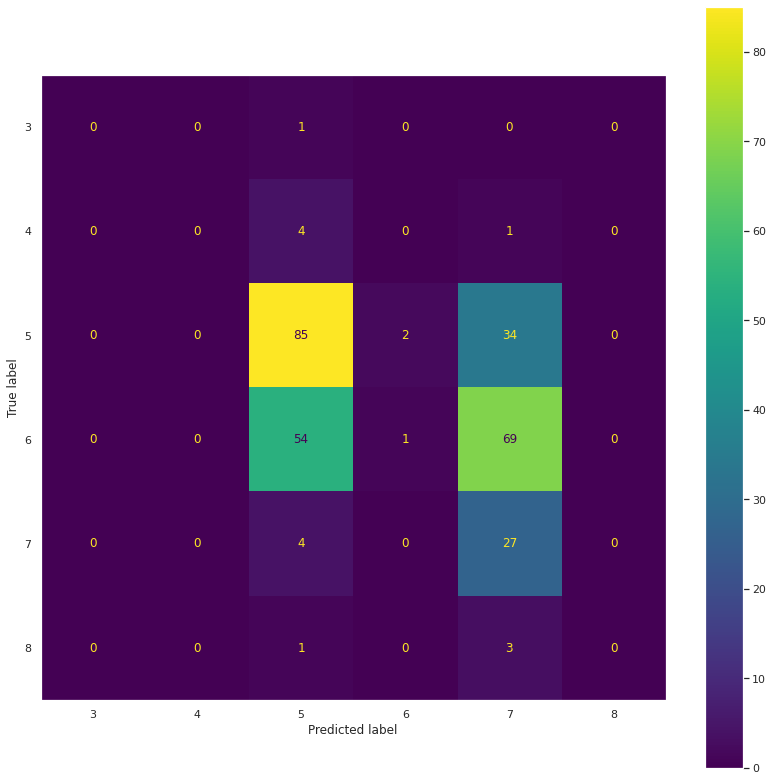

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# BernoulliNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [52]:
model = BernoulliNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

## Realizar una predicción con los datos de prueba.

In [53]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [54]:
accuracy_score(y_test, y_predict)

0.4230769230769231

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [55]:
y_predict

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

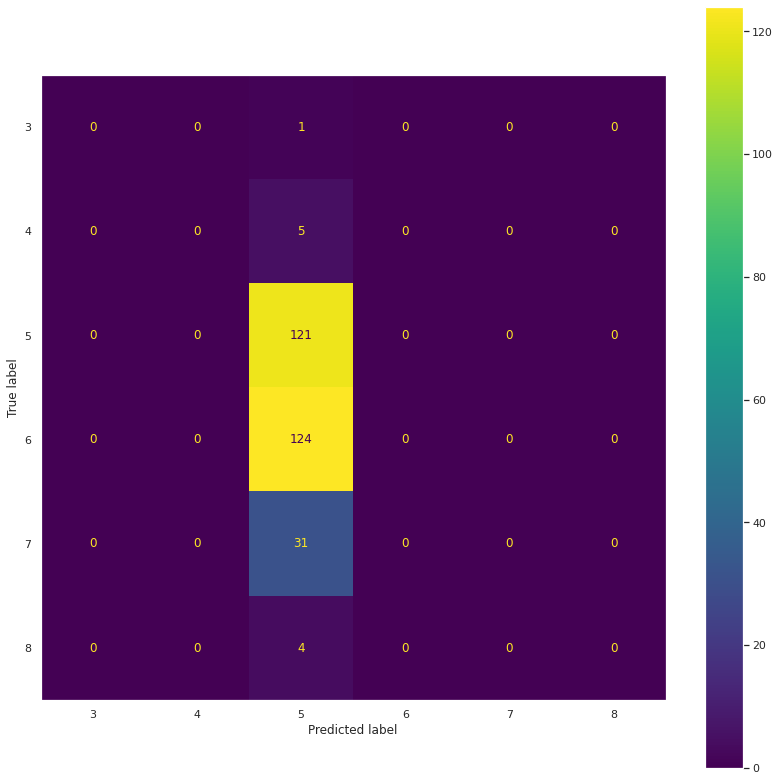

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)

# CategoricalNB

# Entrenamiento y predicción.

## Elegir, instanciar y entrenar el modelo.

In [57]:
model = CategoricalNB()
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB()

## Realizar una predicción con los datos de prueba.

In [58]:
y_predict = model.predict(x_test)

# Evaluación.

## Mostrar el porcentaje de elementos correctamente clasificados.

In [59]:
accuracy_score(y_test, y_predict)

0.5734265734265734

## Mostrar la predicción realizada (imprimir la variable con la predicción).

In [60]:
y_predict

array([6, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 6,
       6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 7, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6])

## Representar gráficamente la clasificación obtenida (matriz de confusión).

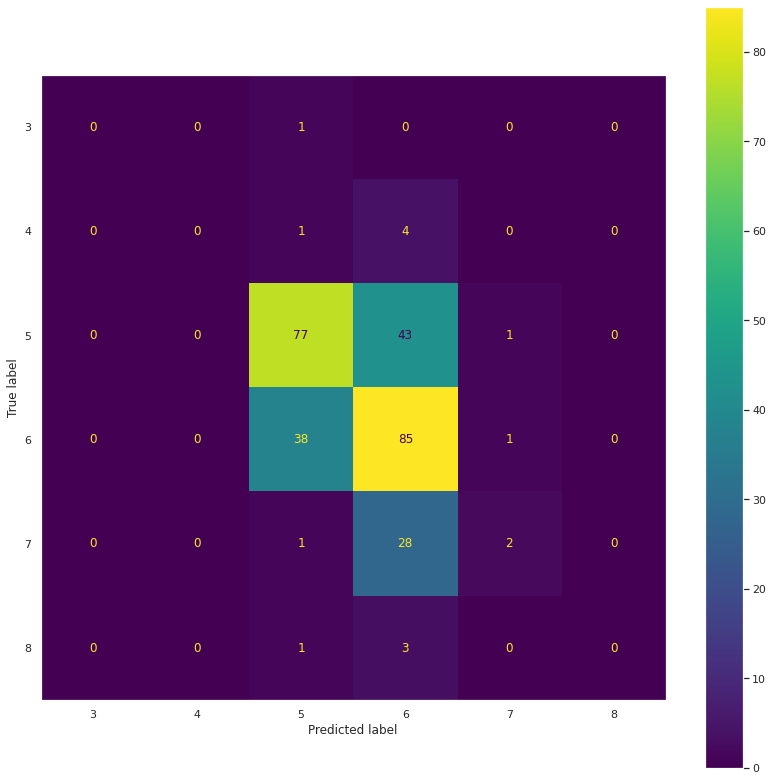

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.grid(b=None)